In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

from qiskit.quantum_info import Operator
from qiskit.circuit.library import CCXGate

from qiskit_aer import AerSimulator

In [2]:
print(qiskit.__version__)
print(np.__version__)

2.1.1
2.3.1


In [3]:
from helper import QCC1, run_transpiled_circuit

'''
In case this shows error of cannot import from helper:
1 Restart
2 Run All
'''

# Give us your intro (Needed for Evaluations)
### your code here ###
name = ""
rollno = ""
### ### ### ###

grader = QCC1()
grader.set_person(name, rollno)

grader.intro_message()

Welcome ,
This the Quantum Circuit Challege, where you will be introduced to basic Qiskit and Quantum stuff.
All The best!


#### Ex1
Create a state of *2-qubits* such that measurement of either qubit yields the states |11> and |00> with near equal probability. Also make sure that any measured qubit yields the same result as the other qubit.

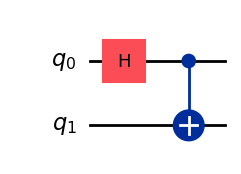

In [4]:
qc_1 = QuantumCircuit(2)

def bellstate(qc: QuantumCircuit):
    ### your code here ###
    qc.h(0)
    qc.cx(0,1)

    ### ### ### ###

bellstate(qc_1)
qc_1.draw('mpl')

In [5]:
grader.Ex1(qc_1)

Good Job . You passed.✅
Your score: 1


#### Ex2
For the previous question, measure the states and plot a histogram showing your measurement data, make sure the histogram is definitive of the nature of the state.\
(Make sure your results yield either |00> or |11> with near equal probability.)
[Hint](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.circuit.QuantumCircuit#measure_all)

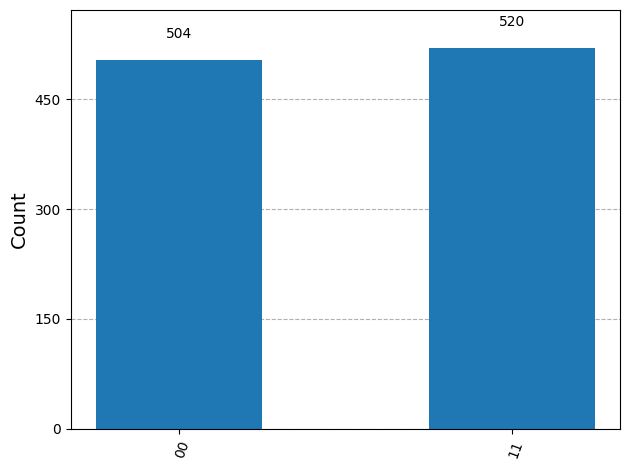

In [6]:
### your code here ###
qc_1.measure_all()

### ### ### ###

counts = run_transpiled_circuit(qc_1)
plot_histogram(counts)

In [7]:
grader.Ex2(counts)

Good Job . You passed.✅
Your score: 2


#### Ex3
Create a *3-qubit* GHZ state. Measure the three qubits and obtain the final states.

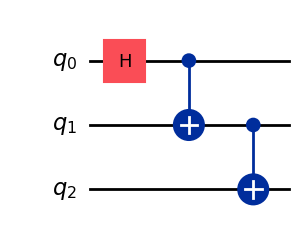

In [8]:
num_qubits = 3      ### your code goes here ###
qc_2 = QuantumCircuit(num_qubits)

def GHZ_state(qc):
    ### your code here ###
    qc.h(0)
    qc.cx(0,1)
    qc.cx(1,2)

    ### ### ### ###

GHZ_state(qc_2)
qc_2.draw('mpl')

In [9]:
grader.Ex3(qc_2)

Good Job . You passed.✅
Your score: 3


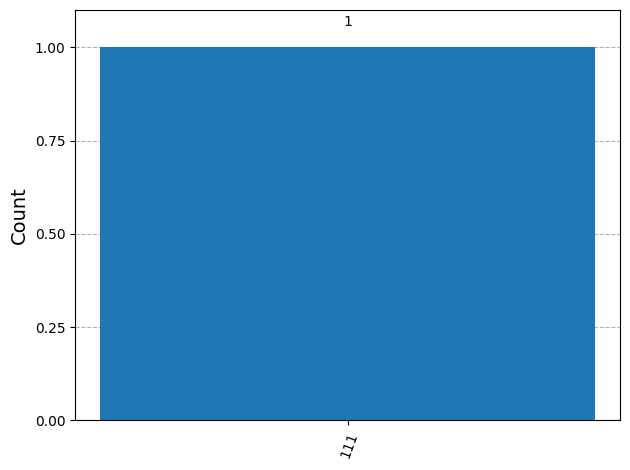

In [10]:
qc_2.measure_all()
counts = run_transpiled_circuit(qc_2, {"shots": 1})
plot_histogram(counts)

In [11]:
### your code here ###
keys = list(counts.keys())
### ### ### ###
string = ','.join(i for i in keys)
print(string)

111


#### Ex4
Create *2-qubits* initialized to states |01> respectively, measure them in the X basis and plot your results.

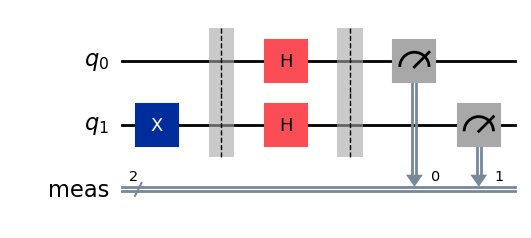

In [12]:
qc_3 = QuantumCircuit(2)

### your code here ###
qc_3.x(1)

### ### ### ###
qc_3.barrier()

### Add the gates for basis measurement
qc_3.h(0)
qc_3.h(1)

### ### ### ###

qc_3.measure_all()
qc_3.draw('mpl')

In [13]:
grader.Ex4(qc_3)

Good Job . You passed.✅
Your score: 4


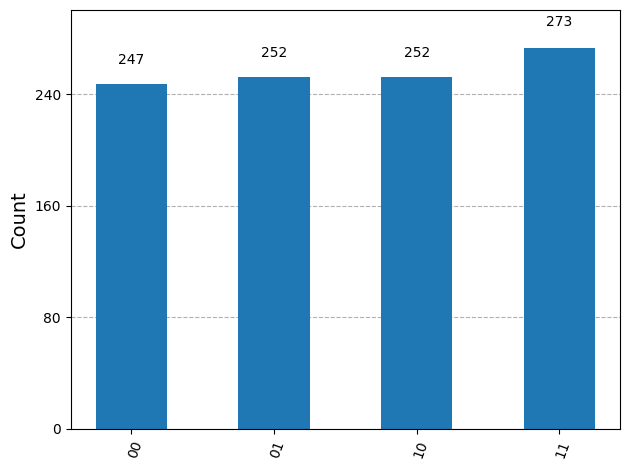

In [14]:
counts = run_transpiled_circuit(qc_3)
plot_histogram(counts)

#### Ex5
Apply an H gate followed by an S gate to a single qubit. Use *plot_bloch_multivector()* to visualize the final state.

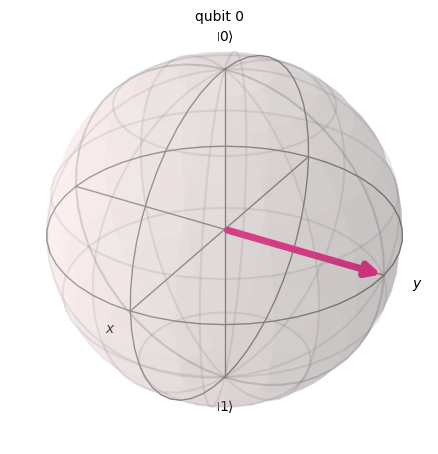

In [15]:
qc_4 =  QuantumCircuit(1)

### your code here ###
qc_4.h(0)
qc_4.s(0)

plot_bloch_multivector(qc_4)
### ### ### ###

In [16]:
grader.Ex5(qc_4)

Good Job . You passed.✅
Your score: 5


#### Ex6
Create a *3-qubit* state. Make the first two qubits take up state |0> or |1> at random.\
Now apply a *toffoli gate* with the last qubit as the target qubit. Measure your results and determine the truth table of the *toffoli gate*.

In [17]:
number = np.random.choice(2,2)
print(number)

[0 1]


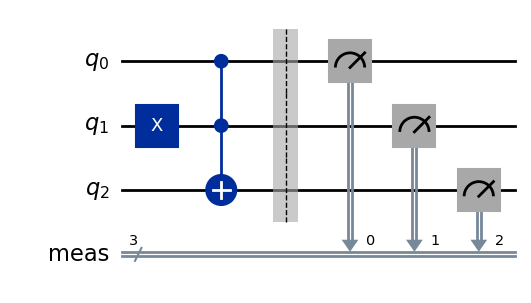

In [18]:
qc_5 = QuantumCircuit(3)

# depending on the bits of number if its 1, set qubit to |1>
for i in range(2):
    ### your code here ###
    if number[i] == 1:
        qc_5.x(i)
    ### ### ### ###

# set the toffoli gate
### your code here ###
qc_5.ccx(0,1,2)
### ### ### ###

qc_5.measure_all()
qc_5.draw('mpl')

In [19]:
grader.Ex6(number, qc_5)

Good Job . You passed.✅
Your score: 6


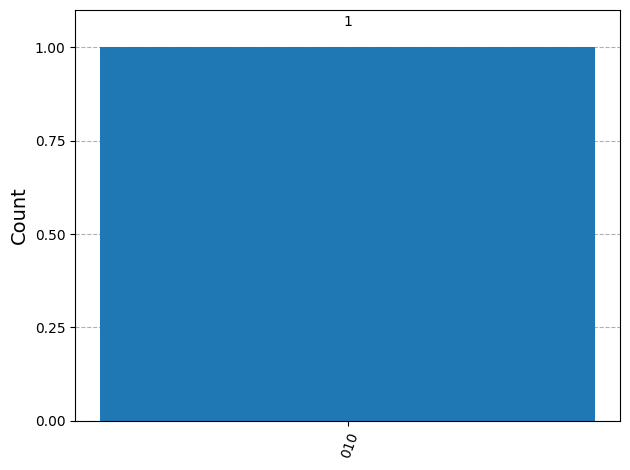

In [20]:
counts = run_transpiled_circuit(qc_5, {"shots": 1})
plot_histogram(counts)

In [21]:
grader.display()


Current score: 6 / 6


#### Bonus
(Make an array with the matrix elements of the toffoli gate for bonus points.)

In [22]:
#numpy array with the matrix elements of toffoli gate
### your code here ###
tof = CCXGate()
matrix = Operator(tof)

print(matrix)
### ### ### ###
toffoli_matrix = np.array(matrix)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [23]:
grader.BonusEx(toffoli_matrix)

Good Job . You passed.✅
Your score: 7


In [24]:
grader.display()
grader.file_dump()


Current score: 7 / 6
7 / 6 answers being saved.
